In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() 
from numpy.random import default_rng
rng = default_rng()

# Algorithme de Metropolis-Hastings 

Soit $E$ un ensemble dénombrable et $\mu$ une mesure de probabilité sur $E$. L'algorithme de Metropolis-Hastings permet de construire une chaîne de Markov de probabilité invariante $\mu$. 

Soit P une matrice permettant de parcourir l'espace d'état $E$ et $p$ la fonction définie comme suit : $ \forall x,y \in E, \rho (x,y) = \displaystyle \text{min} (1 , \frac{\mu (y) P(y,x)}{\mu (x) P(x,y)})$. 

On considère la matrice stochastique suivante : $ Q(x,y) = \begin{cases}
    P(x,y) \rho (x,y), & \text{si } x \neq y  \\
    1 - \displaystyle \sum _{z != x} Q(x,z), & \text{sinon } 
\end{cases}$ 

Sous ces hypothèes, la chaîne de Markov $(Y_n)_{n \geq 1}$ de matrice de transition $Q$ a pour unique probabilité invariante $\mu$ et converge en loi vers $\mu$. 

$ \forall x,y \in E, \rho (x,y) = \displaystyle \text{min} (1 , \frac{\mu (y) P(y,x)}{\mu (x) P(x,y)})$

La fonction $\rho$ est le taux d’acceptation du voisin $y$ proposé (en partant de la position $x$).

In [1]:
def rho(x,y, transition):
    return np.minimum(1, (mu(y) * transition(y,x)) / (mu(x) * transition(x,y)))

## Exemple sur $\mathbb{Z}$

$\forall x \in \mathbb{Z}, \mu (x) = \frac{1}{5} e^{- \frac{|x|}{5}}$ et $P$ la matrice de transition telle que : $P(x,x+1) = P(x,x-1) = \frac{1}{2}$.

In [9]:
def mu(x): 
    return np.exp(- np.abs(x) / 5)

def phi(in_n, out_np1):  #deux tableaux NumPy
    proposals = in_n + (2*rng.integers(2, size=len(in_n))-1)  #à chaque itération, un élément de in_n est augmenté de 1 ou réduit de 1 de manière aléatoire
    ratio_rho = np.minimum(mu(proposals) / mu(in_n), 1)  #rapport de probabilité de transition
    accepted = rng.uniform(size=len(in_n)) < ratio_rho
    out_np1[accepted] = proposals[accepted]
    out_np1[~accepted] = in_n[~accepted]
    return out_np1

In [10]:
ech = 1001
trajectoires = 10000

sample = np.zeros((ech, trajectoires))
for n in range(1, ech):
    phi(sample[n-1], sample[n])

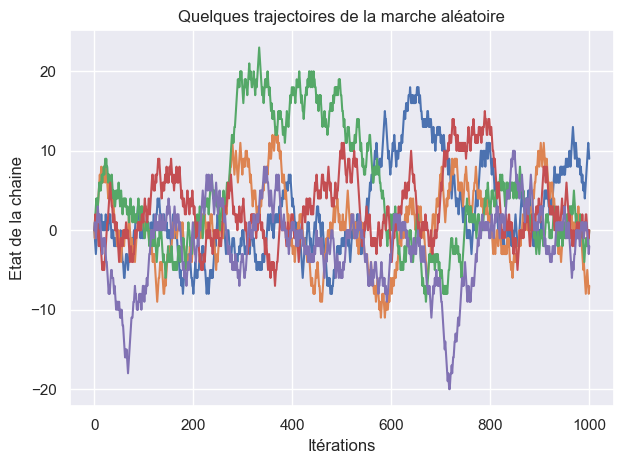

In [12]:
fig, ax = plt.subplots(layout='tight')
ax.plot(np.arange(ech), sample[:,:5])
ax.set_ylabel('Etat de la chaine')
ax.set_xlabel('Itérations')
ax.set_title('Quelques trajectoires de la marche aléatoire')
plt.show()